In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [54]:
train_data = pd.read_csv("fraudTrain.csv")
test_data = pd.read_csv("fraudTest.csv")


In [56]:
le = LabelEncoder()
train_data['category'] = le.fit_transform(train_data['category'])
test_data['category'] = le.transform(test_data['category'])


In [25]:
print(train_data.columns)


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [58]:
cols_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 
                'gender', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num']

X_train = train_data.drop(columns=cols_to_drop + ['is_fraud'])
y_train = train_data['is_fraud']

X_test = test_data.drop(columns=cols_to_drop + ['is_fraud'])
y_test = test_data['is_fraud']

# 🔄 Label encode all object columns (just in case more text exists)
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))


In [60]:
# ⚠️ This line is new: class_weight='balanced'
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

print("✅ Model trained with class_weight='balanced'")


✅ Model trained with class_weight='balanced'


In [61]:
y_pred = model.predict(X_test)

print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


📊 Confusion Matrix:
 [[553557     17]
 [  1880    265]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.94      0.12      0.22      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.56      0.61    555719
weighted avg       1.00      1.00      1.00    555719



In [62]:
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
predictions_df.to_csv('fraud_predictions.csv', index=False)

print("💾 Predictions saved to 'fraud_predictions.csv'")


💾 Predictions saved to 'fraud_predictions.csv'


In [36]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[553205    369]
 [  1121   1024]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.74      0.48      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.87      0.74      0.79    555719
weighted avg       1.00      1.00      1.00    555719



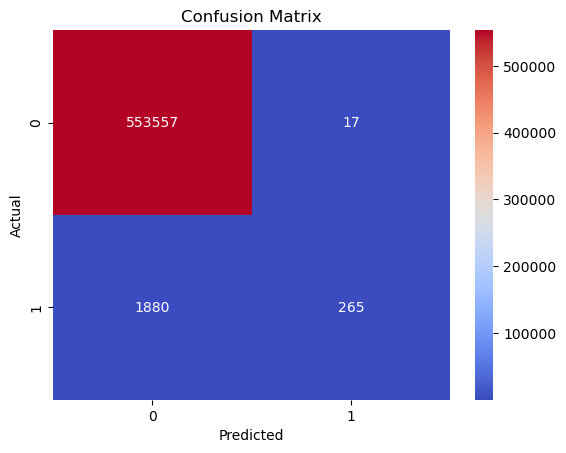

In [63]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict again to be safe
y_pred = model.predict(X_test)

# Print evaluation results
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


🔍 Confusion Matrix:
 [[553205    369]
 [  1121   1024]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.74      0.48      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.87      0.74      0.79    555719
weighted avg       1.00      1.00      1.00    555719



In [67]:
print(y_test.shape)
print(y_pred[:10])  # Print first 10 predictions


(555719,)
[0 0 0 0 0 0 0 0 0 0]


In [75]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Save it as a CSV
predictions_df.to_csv('fraud_predictions.csv', index=False)

print("✅ Predictions saved to fraud_predictions.csv")


✅ Predictions saved to fraud_predictions.csv


In [66]:
import joblib
joblib.dump(model, 'fraud_detection_model.pkl')
print("💾 Model saved as fraud_detection_model.pkl")


💾 Model saved as fraud_detection_model.pkl
